In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import warnings
import numpy as np
from src.features import *
from src.utils import *
import networkx as nx

In [46]:
stocks = ["SPY", "VTV", "VUG", "VYM", "QQQ", "VNQ", "GLD", "AGG", "SOXX", "OIH", "IYT", "XLF", "XLV", "VOX", "XLY", "XLP", "BND", "BSV", "IEMG", "VEA", "VWO"]
stocks = sorted(stocks)

stock_classes = {'AGG': 'EQUITY', 'GLD': 'COMMODITY', 'IYT': 'EQUITY', 'OIH': 'EQUITY', 'QQQ': 'EQUITY',
                 'SOXX': 'EQUITY', 'SPY': 'EQUITY', 'VNQ': 'REAL_ESTATE', 'VOX': 'EQUITY', 'VTV': 'EQUITY',
                 'VUG': 'EQUITY', 'VYM': 'EQUITY', 'XLF': 'EQUITY', 'XLP': 'EQUITY', 'XLV': 'EQUITY', 'XLY': 'EQUITY',
                 "BND": "FIXED_INCOME", "BSV": "FIXED_INCOME", "IEMG": "EQUITY", "VEA": "EQUITY", "VWO": "EQUITY"
}

classes_color = {'EQUITY': 'salmon', 'COMMODITY': 'cyan', 'FIXED_INCOME': 'lightgreen', "REAL_ESTATE": "lightblue"}

len(stocks)

etf_cap = {'AGG': 89.94, 
           'BND': 91.82,
           'BSV': 37.42,
            'GLD': 59.61,
            'IEMG': 69.81,
            'IYT': 0.78,
            'OIH': 2.11,
            'QQQ': 180.33,
            'SOXX': 8,
            'SPY': 390.67,
            'VEA': 112.83,
            'VOX': 2.85,
            'VTV': 96.5,
            'VUG': 85.14,
            'VWO': 71.36,
            'VYM': 47.47,
            'VNQ': 31.35,
            'XLF': 29.44,
            'XLP': 18.55,
            'XLV': 40.46,
            'XLY': 14.93}

In [4]:
path = "C:\\Users\\Андрей\\Documents\\diploma_python\\data"

df_adj_close, df_close, df_high, df_low, df_volume = get_data(path, stocks)

AGG Start of history: 2003-09-29
BND Start of history: 2007-04-10
BSV Start of history: 2007-04-10
GLD Start of history: 2004-11-18
IEMG Start of history: 2012-10-24
IYT Start of history: 2004-01-02
OIH Start of history: 2001-02-26
QQQ Start of history: 1999-03-10
SOXX Start of history: 2001-07-13
SPY Start of history: 1993-01-29
VEA Start of history: 2007-07-26
VNQ Start of history: 2004-09-29
VOX Start of history: 2004-09-29
VTV Start of history: 2004-01-30
VUG Start of history: 2004-01-30
VWO Start of history: 2005-03-10
VYM Start of history: 2006-11-16
XLF Start of history: 1998-12-22
XLP Start of history: 1998-12-22
XLV Start of history: 1998-12-22
XLY Start of history: 1998-12-22


In [9]:
df_return = df_adj_close.pct_change().fillna(0)
df_return.columns=stocks

In [19]:
(df_return + 1).cumprod().tail()

,AGG,BND,BSV,GLD,IEMG,IYT,OIH,QQQ,SOXX,SPY,...,VNQ,VOX,VTV,VUG,VWO,VYM,XLF,XLP,XLV,XLY
Date,,,,,,,,,,,,,,,,,,,,,
2023-02-21,1.112674,1.108480,1.091342,1.034939,1.289034,2.876188,0.475310,4.972424,9.330804,3.431633,...,2.039001,1.615682,3.151641,3.717122,1.302742,2.998759,3.370633,2.738884,3.836368,3.612030
2023-02-22,1.115654,1.110947,1.091632,1.029116,1.283180,2.858768,0.461635,4.976145,9.286056,3.426904,...,2.020567,1.619887,3.143600,3.719841,1.297241,2.990708,3.366850,2.734780,3.823411,3.630396
2023-02-23,1.119665,1.114955,1.092648,1.028570,1.289833,2.895754,0.470736,5.019607,9.591403,3.445133,...,2.035734,1.611302,3.149631,3.750866,1.301771,2.996538,3.369688,2.731422,3.833718,3.627418
2023-02-24,1.113247,1.108789,1.089600,1.021170,1.262423,2.878460,0.480550,4.935558,9.419602,3.408331,...,2.000032,1.587475,3.133996,3.686737,1.276855,2.985433,3.372525,2.713137,3.784247,3.570336
2023-02-27,1.115425,1.110638,1.090761,1.025173,1.268544,2.940693,0.487961,4.970902,9.469450,3.419939,...,2.003066,1.590629,3.133772,3.712644,1.283327,2.984601,3.371579,2.710152,3.772763,3.614512


In [38]:
def gradient_color(position, start_color, end_color):
    return start_color + position * (end_color - start_color)

# Define the start and end colors for the gradient (in RGB format)
start_color = np.array([0, 0, 1])  # Blue
end_color = np.array([1, 0, 0])  # Red

C:\Users\Андрей\AppData\Local\Temp\ipykernel_3404\4277908488.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('tab20c')


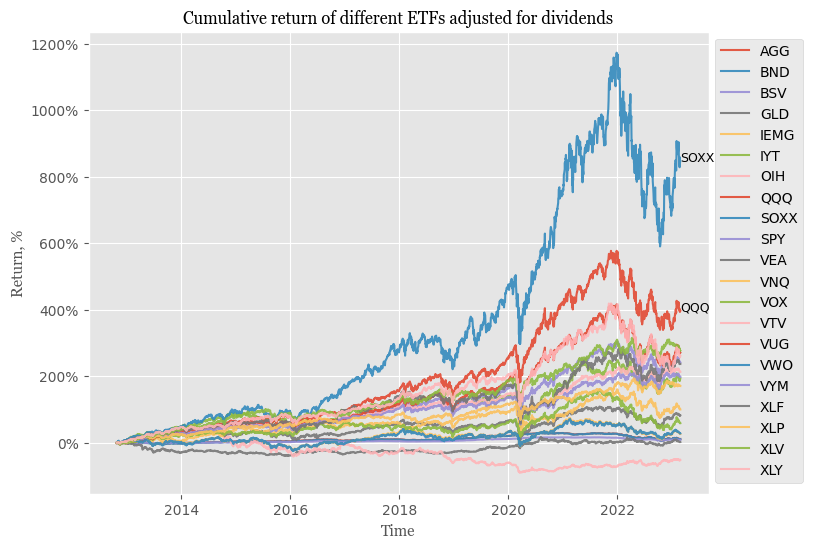

In [39]:
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))

cum_return = (df_return + 1).cumprod() - 1
for i in range(len(stocks)):

    # position = i / (len(stocks) - 1)
    # color = gradient_color(position, start_color, end_color)
    _ = plt.plot(cum_return[stocks[i]], label=stocks[i], alpha=0.9)

_ = plt.annotate('SOXX', (cum_return.index[-1], cum_return['SOXX'][-1]), fontsize=9)
_ = plt.annotate('QQQ', (cum_return.index[-1], cum_return['QQQ'][-1]), fontsize=9)


plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0%}".format(x)))

#set colormap
cm = plt.cm.get_cmap('tab20c')

plt.xlabel('Time', fontsize=11, fontname='Georgia')
plt.ylabel('Return, %', fontsize=11, fontname='Georgia')
plt.legend(loc='upper left', bbox_to_anchor=(1., 1))
plt.title('Cumulative return of different ETFs adjusted for dividends', fontsize=12, fontname='Georgia')
plt.show()

In [43]:
corr_table = df_return.corr()

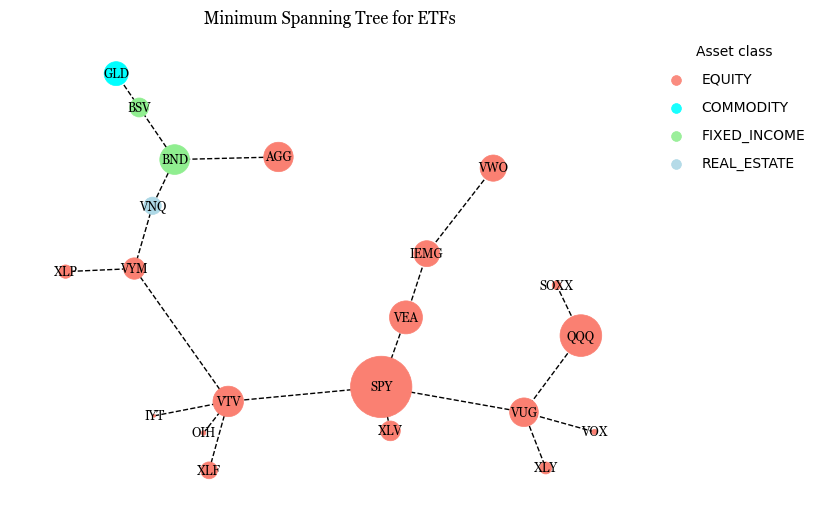

In [76]:
g_distance = np.nan_to_num(np.sqrt(0.5 * (1 - corr_table)), 0)
G = nx.from_numpy_array(g_distance)
T = nx.minimum_spanning_tree(G)

T = nx.relabel_nodes(T, dict(zip(range(len(stocks)), stocks)))

nx.draw_spring(T, with_labels=True, node_size=[etf_cap[stock]*5 for stock in stocks], style='--', 
               font_family='Georgia', font_size=9, node_color=[classes_color[stock_classes[stock]] for stock in stocks])

#add color legend
plt.scatter([],[], c='salmon', alpha=0.9, s=50, label='EQUITY')
plt.scatter([],[], c='cyan', alpha=0.9, s=50, label='COMMODITY')
plt.scatter([],[], c='lightgreen', alpha=0.9, s=50, label='FIXED_INCOME')
plt.scatter([],[], c='lightblue', alpha=0.9, s=50, label='REAL_ESTATE')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Asset class', bbox_to_anchor=(1., 1), loc='upper left', 
           fontsize=10)


plt.title('Minimum Spanning Tree for ETFs', fontsize=12, fontname='Georgia')
plt.show()

Maximum planar tree

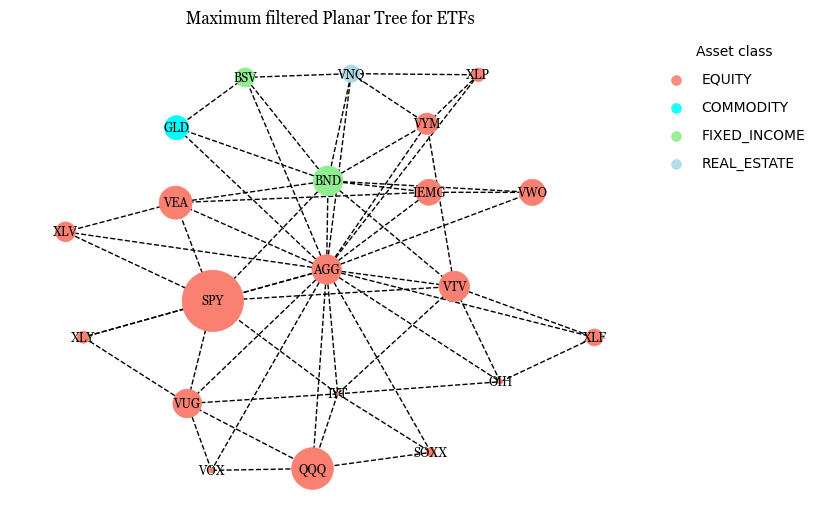

In [78]:
possible_edges = list(nx.complement(T).edges())

for edge in possible_edges:
    T.add_edge(*edge)
    if not nx.check_planarity(T)[0]:
        T.remove_edge(*edge)

T = nx.relabel_nodes(T, dict(zip(range(len(stocks)), stocks)))

nx.draw_spring(T, with_labels=True, node_size=[etf_cap[stock]*5 for stock in stocks], style='--', 
               font_family='Georgia', font_size=9, node_color=[classes_color[stock_classes[stock]] for stock in stocks])

#add color legend
plt.scatter([],[], c='salmon', alpha=0.9, s=50, label='EQUITY')
plt.scatter([],[], c='cyan', alpha=0.9, s=50, label='COMMODITY')
plt.scatter([],[], c='lightgreen', alpha=0.9, s=50, label='FIXED_INCOME')
plt.scatter([],[], c='lightblue', alpha=0.9, s=50, label='REAL_ESTATE')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Asset class', bbox_to_anchor=(1., 1), loc='upper left', 
           fontsize=10)

plt.title('Maximum filtered Planar Tree for ETFs', fontsize=12, fontname='Georgia')
plt.show()